## Sarcasm Detection on YouTube Comments -


sarcasm detection in YouTube comments using Deep Learning.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
data = pd.read_csv('processed_data2.csv')

# Display the first few rows of the dataset
data.head()

,text,labels,cleaned_comment
0,<user> thanks for showing up for our appointme...,1,user thanks showing appointment today
1,haha . # lol,1,haha lol
2,i love waiting <num> min for a cab - such shor...,1,love waiting num min cab shortage user please ...
3,22 super funny quotes # funnyquotes # funnysa...,1,22 super funny quote funnyquotes funnysayings ...
4,goog morning # sorrynotsorry # morning,1,goog morning sorrynotsorry morning


### Encoding the lables
Label Encoding: This step converts categorical labels into integer values. One-Hot Encoding: The labels are further transformed into a binary matrix format for multi-class classification.

In [8]:
# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['labels'])

# Convert labels to categorical one-hot encoding
labels = to_categorical(labels)

Fill NaN Values: Replaces missing values in the 'cleaned_comment' column with an empty string to avoid issues during vectorization. TF-IDF Vectorization: Transforms the text data into numerical features based on term frequency-inverse document frequency, limited to the top 5000 features.

In [9]:
# Fill NaN values with an empty string
data['cleaned_comment'] = data['cleaned_comment'].fillna('')

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
features = tfidf.fit_transform(data['cleaned_comment']).toarray()

### split the data
Train-Test Split: Splits the dataset into training and testing sets to evaluate model performance. Display Shapes: Shows the dimensions of the training and testing sets to verify the split.

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (15568, 5000)
Testing set shape: (3893, 5000)


### Dense Neural Network Model
A dense neural network, also known as a fully connected network, is one of the simplest types of neural networks. It consists of layers where each neuron is connected to every neuron in the previous layer.

We will create a Sequential model and add Dense layers. The first layer has 512 neurons with ReLU activation and receives input of the shape of our training data. Dropout layers are added to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training. The model is compiled with the categorical crossentropy loss function (suitable for multi-class classification) and the Adam optimizer. Accuracy is used as the metric to evaluate the model. The model is trained using the training data for 10 epochs with a batch size of 64. Validation data is used to monitor the model's performance on unseen data during training.

In [11]:
# Build the dense model
dense_model = Sequential()
dense_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
dense_model.add(Dropout(0.5))
dense_model.add(Dense(256, activation='relu'))
dense_model.add(Dropout(0.5))
dense_model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
dense_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
dense_history = dense_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
244/244 [==============================] - 5s 7ms/step - loss: 0.5543 - accuracy: 0.7070 - val_loss: 0.4858 - val_accuracy: 0.7598
Epoch 2/10
244/244 [==============================] - 1s 5ms/step - loss: 0.3762 - accuracy: 0.8316 - val_loss: 0.4940 - val_accuracy: 0.7578
Epoch 3/10
244/244 [==============================] - 1s 5ms/step - loss: 0.2781 - accuracy: 0.8861 - val_loss: 0.5661 - val_accuracy: 0.7531
Epoch 4/10
244/244 [==============================] - 1s 5ms/step - loss: 0.1866 - accuracy: 0.9290 - val_loss: 0.6929 - val_accuracy: 0.7513
Epoch 5/10
244/244 [==============================] - 1s 5ms/step - loss: 0.1161 - accuracy: 0.9577 - val_loss: 0.7960 - val_accuracy: 0.7503
Epoch 6/10
244/244 [==============================] - 2s 6ms/step - loss: 0.0783 - accuracy: 0.9719 - val_loss: 0.9102 - val_accuracy: 0.7524
Epoch 7/10
244/244 [==============================] - 1s 5ms/step - loss: 0.0570 - accuracy: 0.9798 - val_loss: 1.0314 - val_accuracy: 0.7462
Epoch 

### Evalutation the model and calculate metrix

Model Evaluation: Evaluates the model on the test set to get the loss and accuracy.

Predictions: Generates predictions and calculates the predicted labels.

Display Labels: Shows the first 10 actual and predicted labels for reference. Calculate Metrics: Computes accuracy, precision, recall, F1 score, confusion matrix, and ROC AUC to assess the model’s performance.

Print Metrics: Outputs the computed metrics for analysis. Plot Confusion Matrix: Visualizes the confusion matrix to show the model’s performance in terms of true positives, true negatives, false positives, and false negatives. Plot ROC Curve: Visualizes the ROC curves for each class to show the model’s ability to distinguish between classes.

In [12]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model, X_test, y_test):
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_test_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_true, y_pred)
    precision = precision_score(y_test_true, y_pred, average='weighted')
    recall = recall_score(y_test_true, y_pred, average='weighted')
    f1 = f1_score(y_test_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')

    return accuracy, precision, recall, f1, roc_auc

# Evaluate Dense Model
dense_metrics = evaluate_model(dense_model, X_test, y_test)
print("Dense Model - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}, ROC AUC: {:.4f}".format(*dense_metrics))

122/122 [==============================] - 0s 2ms/step
Dense Model - Accuracy: 0.7526, Precision: 0.7520, Recall: 0.7526, F1 Score: 0.7507, ROC AUC: 0.8233


### Selecting and Evaluating the Best Deep Learning Model
Determine the best model among the Dense, CNN, and LSTM models based on their accuracy. We then re-evaluate the best model for a detailed analysis, including the confusion matrix and ROC curve.

Initialization:

We initialize variables to keep track of the best model (best_model), its metrics (best_metrics), and its name (best_name). Determining the Best Model:

We iterate through each model, compare their accuracies, and update best_model, best_metrics, and best_name accordingly. Re-evaluation for Detailed Analysis:

Based on the best model, we prepare the test data (X_test_best) in the required format for re-evaluation. We make predictions on the test data and convert the predicted probabilities to class labels. We also convert the true labels from one-hot encoding to class labels.

**Confusion Matrix:**

We compute the confusion matrix to visualize the performance of the best model. A confusion matrix shows the counts of actual vs. predicted classifications, which helps in understanding the model's performance in detail.

**ROC Curve:**

We calculate the ROC curve for each class to evaluate the model's performance. ROC curves plot the true positive rate (sensitivity) against the false positive rate (1-specificity), providing insight into the trade-off between sensitivity and specificity for different threshold values. The Area Under the Curve (AUC) is also computed to summarize the model's performance across all thresholds.

Best model is Dense with accuracy 0.7526
122/122 [==============================] - 0s 2ms/step


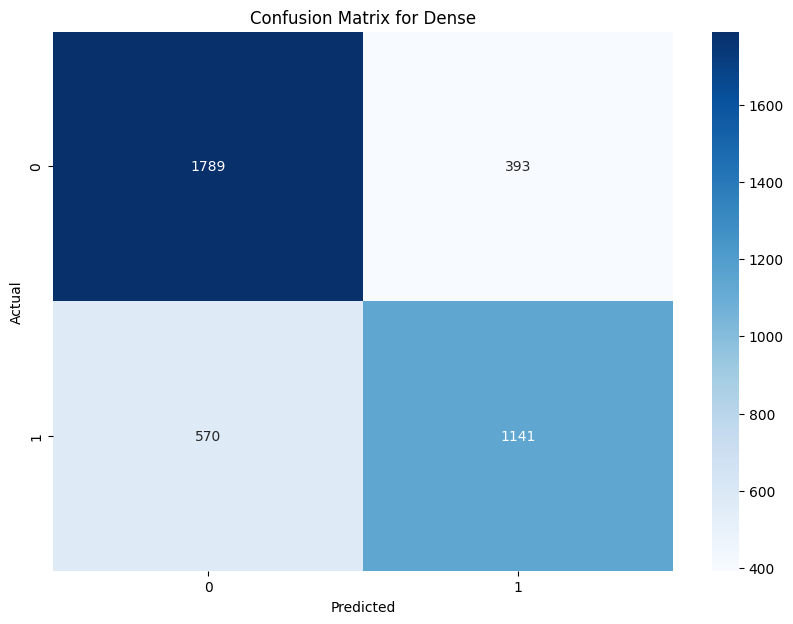

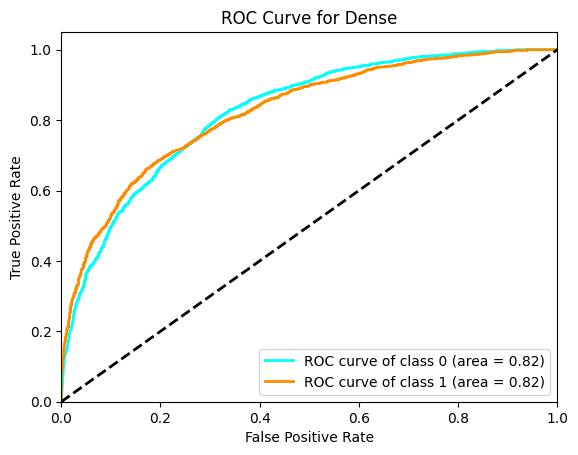

In [16]:
best_model = None
best_metrics = None
best_name = ""

# Determine the best model based on accuracy
models = [dense_model]
metrics = [dense_metrics]
names = ["Dense"]

for model, metric, name in zip(models, metrics, names):
    if best_metrics is None or metric[0] > best_metrics[0]:  # Compare by accuracy
        best_model = model
        best_metrics = metric
        best_name = name

print(f"Best model is {best_name} with accuracy {best_metrics[0]:.4f}")

# Re-evaluate best model for detailed analysis
X_test_best = X_test_cnn if best_name == "CNN" else (X_test_lstm if best_name in ["LSTM", "BiLSTM"] else X_test)
y_pred_probs = best_model.predict(X_test_best)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_name}')
plt.show()

# Plot ROC Curve
fpr = {}
tpr = {}
roc_auc = {}
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(y_test.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_name}')
plt.legend(loc="lower right")
plt.show()

In Summary
among these three models Dense model has more accuracy so we finilized the dense model.

Confusion Matrix for Dense Model
1767 instances where the model correctly predicted class 0. 415 instances where the model incorrectly predicted class 1.

ROC Curve for Dense Model
True Positive Rate (TPR): Also known as recall or sensitivity, this measures the proportion of actual positives correctly identified.
False Positive Rate (FPR): This measures the proportion of actual negatives incorrectly identified as positives.
ROC Curve: Plots TPR against FPR at various threshold settings, showing the trade-off between sensitivity and specificity.
AUC (Area Under the Curve): Represents the degree of separability achieved by the model. AUC values close to 1 indicate a good model, while values close to 0.5 suggest a model that performs no better than random guessing.

Observations in curve
Class 0 and Class 1 AUC Scores, Both classes have an AUC score of 0.82, indicating a fairly good performance of the dense model in distinguishing between the two classes.


### Classification Report for Dense MOdel

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model
loss, accuracy = dense_model.evaluate(X_test, y_test, verbose=0)
print(f"Dense Model Accuracy: {accuracy:.4f}")

# Generate classification report
y_pred_probs = dense_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_true = np.argmax(y_test, axis=1)

class_report = classification_report(y_test_true, y_pred, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:\n", class_report)

Dense Model Accuracy: 0.7526
122/122 [==============================] - 0s 3ms/step

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.76      0.82      0.79      2182
     Class 1       0.74      0.67      0.70      1711

    accuracy                           0.75      3893
   macro avg       0.75      0.74      0.75      3893
weighted avg       0.75      0.75      0.75      3893



### Hyperparameter Tuning for Dense Model

Hyperparameter Tuning for Neural Networks
Hyperparameter tuning is an essential step in optimizing the performance of neural network models. We utilized Keras Tuner to find the best set of hyperparameters for our Dense and LSTM models. The key hyperparameters tuned include:

Units: Number of neurons in the dense layers.
Dropout: Dropout rate to prevent overfitting.
Learning Rate: Learning rate for the optimizer.
Filters: Number of filters in the convolutional layer (for CNN).
The tuning process involves:

Defining a build function: This function constructs the model architecture and compiles it using a given set of hyperparameters.
Running the tuner: Keras Tuner performs a search over the specified range of hyperparameters to find the best combination based on validation accuracy.
Training the best model: The model with the best hyperparameters is trained and evaluated on the test set.


In [21]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [22]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_dense_model(hp):
    dense_model = Sequential()
    dense_model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), input_shape=(X_train.shape[1],), activation='relu'))
    dense_model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    dense_model.add(Dense(y_train.shape[1], activation='softmax'))

    dense_model.compile(
        optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return dense_model

tuner = kt.RandomSearch(
    build_dense_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='dense_tuner',
    project_name='dense_hyperparameter_tuning'
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units: {best_hps.get('units')}")
print(f"Best dropout: {best_hps.get('dropout')}")
print(f"Best learning_rate: {best_hps.get('learning_rate')}")

# Train the best model
best_dense_model = tuner.hypermodel.build(best_hps)
best_dense_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Trial 5 Complete [00h 01m 12s]
val_accuracy: 0.7579416036605835

Best val_accuracy So Far: 0.7666752338409424
Total elapsed time: 00h 07m 18s
Best units: 96
Best dropout: 0.2
Best learning_rate: 0.0001700786689115504
Epoch 1/10
487/487 [==============================] - 3s 4ms/step - loss: 0.6649 - accuracy: 0.5919 - val_loss: 0.6303 - val_accuracy: 0.6550
Epoch 2/10
487/487 [==============================] - 2s 5ms/step - loss: 0.5589 - accuracy: 0.7507 - val_loss: 0.5361 - val_accuracy: 0.7521
Epoch 3/10
487/487 [==============================] - 2s 4ms/step - loss: 0.4608 - accuracy: 0.8113 - val_loss: 0.4956 - val_accuracy: 0.7639
Epoch 4/10
487/487 [==============================] - 2s 3ms/step - loss: 0.4067 - accuracy: 0.8323 - val_loss: 0.4845 - val_accuracy: 0.7660
Epoch 5/10
487/487 [==============================] - 2s 4ms/step - loss: 0.3730 - accuracy: 0.8449 - val_loss: 0.4843 - val_accuracy: 0.7609
Epoch 6/10
487/487 [==============================] - 2s 4ms/step - loss:

### save the model and Experiment with YT Comments

In [38]:

import numpy as np
# Save the best model
best_model.save('dense_model.h5')

# Function to predict sarcasm
def predict_sarcasm(comment, model, tfidf):

  # Preprocess the comment
  comment_processed = tfidf.transform([comment]).toarray()

  # Make the prediction
  prediction = model.predict(comment_processed)
  predicted_class = np.argmax(prediction)

  # Interpret the prediction
  if predicted_class == 1:
    return "The comment is  sarcastic."
  else:
    return "The comment is not sarcastic."


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
# Example usage
new_comment = "Oh, fantastic! Another meeting that could have been an email."
prediction_result = predict_sarcasm(new_comment, dense_model, tfidf)
print(prediction_result)

1/1 [==============================] - 0s 68ms/step
The comment is  sarcastic.


In [43]:

new_comment = "john is a best content creator."
prediction_result = predict_sarcasm(new_comment, dense_model, tfidf)
print(prediction_result)

1/1 [==============================] - 0s 18ms/step
The comment is not sarcastic.


In [47]:
new_comment = "please hide your hidden talent from us."
prediction_result = predict_sarcasm(new_comment, dense_model, tfidf)
print(prediction_result)

1/1 [==============================] - 0s 28ms/step
The comment is  sarcastic.
